### Read data file with all hatchery releases
### Plot hatchery and wild trap counts with date starting at hatchery release

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sys import platform
from datetime import timedelta
import matplotlib.gridspec as gridspec

In [2]:
if platform == "linux" or platform == "linux2":
    data_string = "/home/maria/Documents/data/pied_piper/"
    output_string = "/home/maria/Documents/output/pied_piper/"
else:
    data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/"
    output_string = "C:/Users/maria/OneDrive/Documents/output/pied_piper/"

In [12]:
df = pd.read_csv(data_string + "dungeness/dungeness_all_days_hatchery_release.csv", header = 0)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(df)
df['Date'] = pd.to_datetime(df['Date'])

In [80]:
chinook0_list = df['Date'][~np.isnan(df['chinook0_hatchery_total_release'])]
print(chinook0_list)

hatchery_release_chinook0_list = []
for i in range(len(chinook0_list)):
    if i == 0:
        hatchery_release_chinook0_list.append(chinook0_list.index[0])
    else:
        
        if (chinook0_list.iloc[i] - chinook0_list.iloc[i-1] < timedelta(days = 40)):
            continue
        else:
            hatchery_release_chinook0_list.append(chinook0_list.index[i])
            
print(hatchery_release_chinook0_list)           
    



452    2006-06-03
470    2006-06-21
617    2006-11-15
801    2007-05-18
827    2007-06-13
1170   2008-05-21
1205   2008-06-25
1528   2009-05-14
1558   2009-06-13
1912   2010-06-02
1914   2010-06-04
2289   2011-06-14
2651   2012-06-10
2656   2012-06-15
3012   2013-06-06
3388   2014-06-17
3389   2014-06-18
3737   2015-06-01
3744   2015-06-08
4108   2016-06-06
4109   2016-06-07
4111   2016-06-09
4468   2017-06-01
4833   2018-06-01
4836   2018-06-04
4839   2018-06-07
5207   2019-06-10
5574   2020-06-11
Name: Date, dtype: datetime64[ns]
[452, 617, 801, 1170, 1528, 1912, 2289, 2651, 3012, 3388, 3737, 4108, 4468, 4833, 5207, 5574]


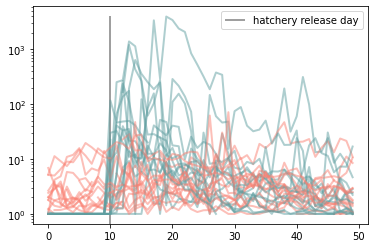

In [71]:
fig = plt.figure(figsize=(6,4))
for i in hatchery_release_chinook0_list:
    
    plt.plot(range(50), df['chinook0_hatchery_perhour'][i-10:i+40]+1, color="cadetblue", alpha = 0.5, linewidth = 2)
    plt.plot(range(50), df['chinook0_wild_perhour'][i-10:i+40]+1, color="salmon", alpha = 0.5, linewidth = 2)
    
    
    
plt.vlines(10,0,4000, "gray", alpha = 1, label = 'hatchery release day')
plt.legend()
plt.yscale("log")    
    

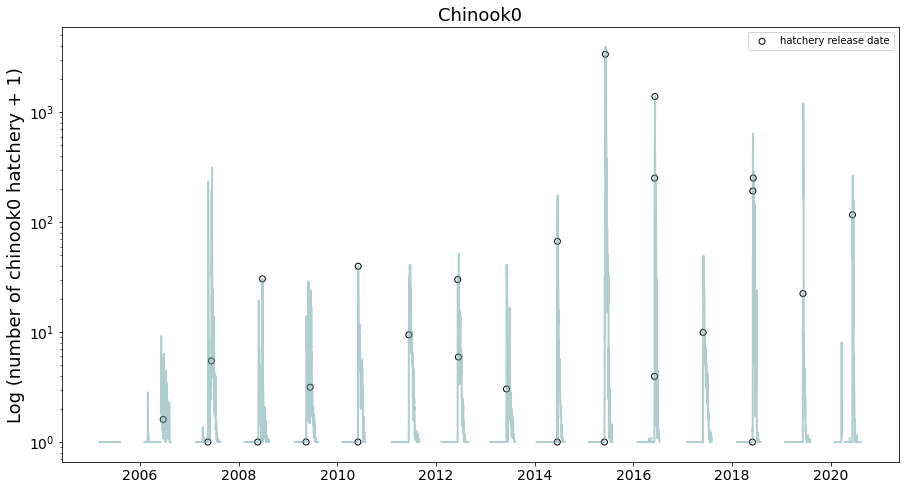

In [81]:
# make visualization for meeting tomorrow

fig = plt.figure(figsize=(15,8))
plt.plot(df['Date'], df['chinook0_hatchery_perhour']+1, color="cadetblue", alpha = 0.5, linewidth = 2)
plt.yscale("log")
plt.scatter(chinook0_list, df['chinook0_hatchery_perhour'][chinook0_list.index]+1, facecolors='none', 
            color = 'black', label = 'hatchery release date')

plt.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Chinook0",fontsize = 18)
plt.ylabel("Log (number of chinook0 hatchery + 1)",fontsize = 18)
plt.savefig(output_string + 'dungeness/hatchery_release_chinook0.jpeg')

/home/maria/miniconda3/envs/analysis/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/maria/miniconda3/envs/analysis/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


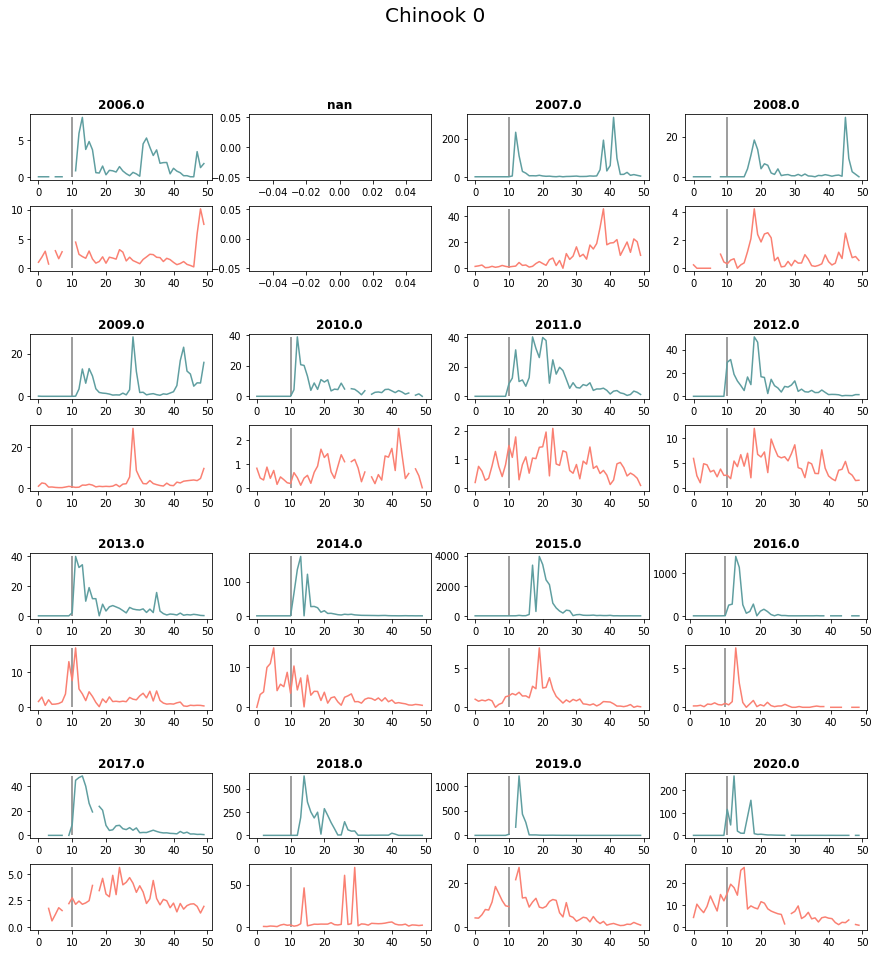

In [106]:
fig = plt.figure(figsize=(15, 15))
plt.suptitle("Chinook 0", fontsize = 20)
outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.4)

for i in range(16):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.4)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
#         t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i, j))
#         t.set_ha('center')
        if j == 0:
            ax.plot(range(50), df['chinook0_hatchery_perhour'][hatchery_release_chinook0_list[i]-10:hatchery_release_chinook0_list[i]+40], "cadetblue")
            ax.vlines(10,0,np.max(df['chinook0_hatchery_perhour'][hatchery_release_chinook0_list[i]-10:hatchery_release_chinook0_list[i]+40]), "black", alpha = 0.5)
            ax.set_title((df['year'][hatchery_release_chinook0_list[i] + 10]), fontweight="bold")
        else:               
            ax.plot(range(50), df['chinook0_wild_perhour'][hatchery_release_chinook0_list[i]-10:hatchery_release_chinook0_list[i]+40], "salmon")
            ax.vlines(10,0,np.max(df['chinook0_wild_perhour'][hatchery_release_chinook0_list[i]-10:hatchery_release_chinook0_list[i]+40]), "black", alpha = 0.5)
#         ax.set_xticks([])
#         ax.set_yticks([])
        
        fig.add_subplot(ax)

# plt.savefig(output_string + '/chinook0_hatchery_wild_all_years.jpeg', dpi = 300)

In [103]:
df['year'][hatchery_release_chinook0_list[0] + 10]

2006.0

SyntaxError: unexpected EOF while parsing (<ipython-input-88-576057339a52>, line 2)

nan

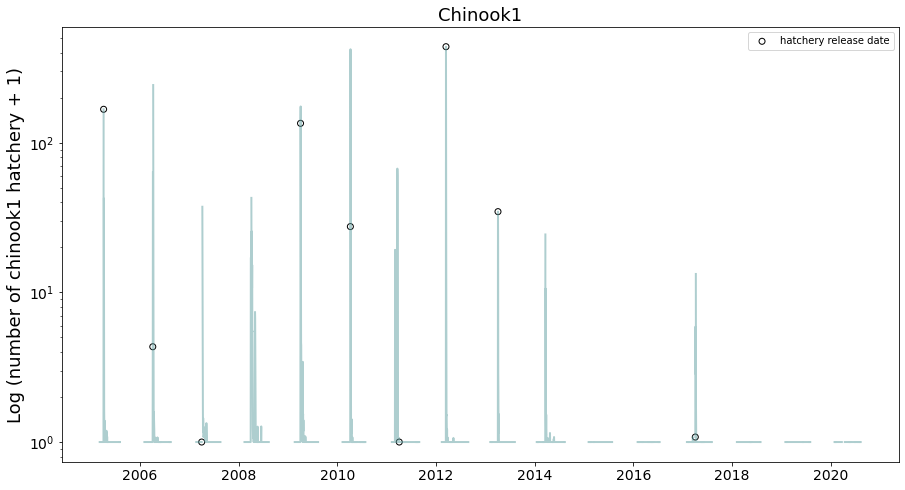

In [31]:
chinook1_list = df['Date'][~np.isnan(df['chinook1_hatchery_total_release'])]
fig = plt.figure(figsize=(15,8))
plt.plot(df['Date'], df['chinook1_hatchery_perhour']+1, color="cadetblue", alpha = 0.5, linewidth = 2)
plt.yscale("log")
plt.scatter(chinook1_list, df['chinook1_hatchery_perhour'][chinook1_list.index]+1, facecolors='none', 
            color = 'black', label = 'hatchery release date')
plt.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Chinook1",fontsize = 18)
plt.ylabel("Log (number of chinook1 hatchery + 1)",fontsize = 18)
plt.savefig(output_string + 'dungeness/hatchery_release_chinook1.jpeg')

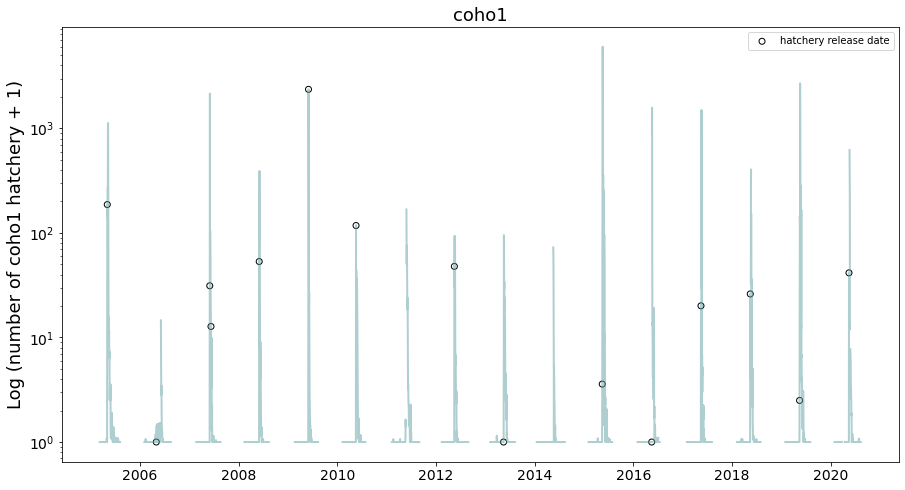

In [32]:
coho1_list = df['Date'][~np.isnan(df['coho1_hatchery_total_release'])]
fig = plt.figure(figsize=(15,8))
plt.plot(df['Date'], df['coho1_hatchery_perhour']+1, color="cadetblue", alpha = 0.5, linewidth = 2)
plt.yscale("log")
plt.scatter(coho1_list, df['coho1_hatchery_perhour'][coho1_list.index]+1, facecolors='none', 
            color = 'black', label = 'hatchery release date')
plt.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("coho1",fontsize = 18)
plt.ylabel("Log (number of coho1 hatchery + 1)",fontsize = 18)
plt.savefig(output_string + 'dungeness/hatchery_release_coho1.jpeg')

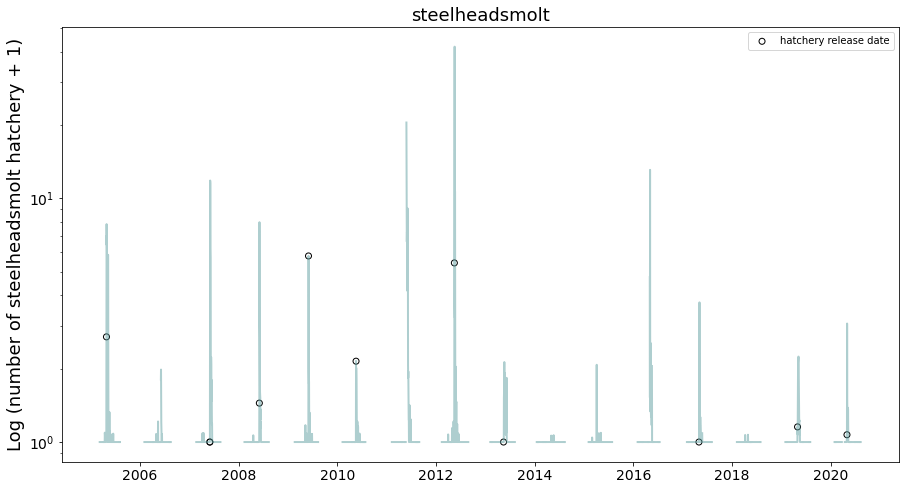

In [33]:
steelheadsmolt_list = df['Date'][~np.isnan(df['steelheadsmolt_hatchery_total_release'])]
fig = plt.figure(figsize=(15,8))
plt.plot(df['Date'], df['steelheadsmolt_hatchery_perhour']+1, color="cadetblue", alpha = 0.5, linewidth = 2)
plt.yscale("log")
plt.scatter(steelheadsmolt_list, df['steelheadsmolt_hatchery_perhour'][steelheadsmolt_list.index]+1, facecolors='none', 
            color = 'black', label = 'hatchery release date')
plt.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("steelheadsmolt",fontsize = 18)
plt.ylabel("Log (number of steelheadsmolt hatchery + 1)",fontsize = 18)
plt.savefig(output_string + 'dungeness/hatchery_release_steelheadsmolt.jpeg')